<h1>Programming Exercise 2: Logistic Regression</h1>

<h3>Introduction</h3>

In this exercise we will implement logistic regression and apply it to two different datases.

<h3>Files Included in this exercise</h3>

- ex2data1.txt
- ex2data2.txt


<h3>1 Logistic Regression</h3>
Here we will build a logistic regression model to predict whether a student gets admitted into a university given the results of two exams. Our training set consists of samples of applicants' scores on two exams and an admissions decision.

In [2]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot as plt

# Optimization module in scipy
from scipy import optimize

# tells matplotlib to embed plots within the notebook
%matplotlib inline

<h4>Visualizing the data</h4>

Before we begin on the algorithm we load and visualize the data.

In [3]:
# Load data
# The first two columns contains the exam scores and the third column
# contains the label.
data = np.loadtxt(os.path.join('Data', 'ex2data1.txt'), delimiter=',')
X, y = data[:, 0:2], data[:, 2]

In [4]:
def plotData(X,y):
    # New figure
    fig = plt.figure()

    # Find indeces of positive and negative examples 
    # Then plot them seperately (Don't try to plot then label after)
    pos = y == 1
    neg = y == 0

    plt.plot(X[pos,0],X[pos,1],'k*', lw=2, ms=7)
    plt.plot(X[neg,0],X[neg,1],'yo',mec='k',ms=7)


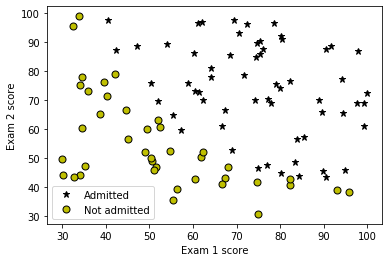

In [5]:
plotData(X,y)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(["Admitted", "Not admitted"])
pass

<h4>1.2 Implementation</h4>
First we construct the sigmoid function defined as:
$$h_\theta(x) = g(\theta^Tx)$$

In [6]:
def sigmoid(z):
    """
    Compute sigmoid function given the input z.
    
    Parameters
    ----------
    z : array_like
        The input to the sigmoid function. This can be a 1-D vector 
        or a 2-D matrix. 
    
    Returns
    -------
    g : array_like
        The computed sigmoid function. g has the same shape as z, since
        the sigmoid is computed element-wise on z.
    """
    # convert input to a numpy array
    z = np.array(z)

    g = 1 + np.exp(-1*z)
    g = np.reciprocal(g)

    return g

In [7]:
# Check a few values of sigmoid
print("Sigmoid of 0 is ",sigmoid(0))
print("Sigmoid of 100 is ",sigmoid(100))
print("Sigmoid of -100 is ",sigmoid(-100))

# sigmoid of 0 should be exactly 0.5
# sigmoid of large positive numbers should be close to 1
# sigmoid of large negative numbers should be close to 0

Sigmoid of 0 is  0.5
Sigmoid of 100 is  1.0
Sigmoid of -100 is  3.7200759760208356e-44


With a working sigmoid function, we can now implement a cost function which returns the cost and gradient for cost defined as:

$$\begin{align}
J(\theta) & = \dfrac{1}{m} \sum_{i=1}^m \mathrm{Cost}(h_\theta(x^{(i)}),y^{(i)}) \\
& = - \dfrac{1}{m} [\sum_{i=1}^{m} y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1-h_\theta(x^{(i)}))] \\
\end{align}$$

and derivative:

$$\frac{\partial}{\partial \theta_j} J(\theta) = \dfrac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}$$

In [8]:
# Setup the data matrix appropriately, and add ones for the intercept term
m, n = X.shape

# Add intercept term to X
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [9]:
def costFunction(theta,X,y):
    """
    Compute cost and gradient for logistic regression. 
    
    Parameters
    ----------
    theta : array_like
        The parameters for logistic regression. This a vector
        of shape (n+1, ).
    
    X : array_like
        The input dataset of shape (m x n+1) where m is the total number
        of data points and n is the number of features. We assume the 
        intercept has already been added to the input.
    
    y : arra_like
        Labels for the input. This is a vector of shape (m, ).
    
    Returns
    -------
    J : float
        The computed value for the cost function. 
    
    grad : array_like
        A vector of shape (n+1, ) which is the gradient of the cost
        function with respect to theta, at the current values of theta.
    """
    ## Initialize some useful values
    m = y.size  # number of training examples
    J = 0
    grad = np.zeros(theta.shape)
    h = sigmoid(X.dot(theta))
    logh = np.log(h)
    tempLog = np.log(1-h)
    yTrans = y.transpose()
    Xtrans = X.transpose()
    tempTrans = (1-y).transpose()
    
    
    J = ((-yTrans).dot(logh))
    J = J - tempTrans.dot(tempLog)
    J = J * (1/m)
    
    diff = np.subtract(sigmoid(X.dot(theta)),y)
    grad = Xtrans.dot(diff)
    grad = grad * (1/m)
    
    # =============================================================
    return J, grad
    

We now test our cost function with varying initial thetas

In [10]:
# Initialize fitting parameters
initial_theta = np.zeros(n+1)

cost, grad = costFunction(initial_theta, X, y)

print('Cost at initial theta (zeros): {:.3f}'.format(cost))
print('Expected cost (approx): 0.693\n')

print('Gradient at initial theta (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}]'.format(*grad))
print('Expected gradients (approx):\n\t[-0.1000, -12.0092, -11.2628]\n')

# Compute and display cost and gradient with non-zero theta
test_theta = np.array([-24, 0.2, 0.2])
cost, grad = costFunction(test_theta, X, y)

print('Cost at test theta: {:.3f}'.format(cost))
print('Expected cost (approx): 0.218\n')

print('Gradient at test theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*grad))
print('Expected gradients (approx):\n\t[0.043, 2.566, 2.647]')

Cost at initial theta (zeros): 0.693
Expected cost (approx): 0.693

Gradient at initial theta (zeros):
	[-0.1000, -12.0092, -11.2628]
Expected gradients (approx):
	[-0.1000, -12.0092, -11.2628]

Cost at test theta: 0.218
Expected cost (approx): 0.218

Gradient at test theta:
	[0.043, 2.566, 2.647]
Expected gradients (approx):
	[0.043, 2.566, 2.647]


Now that we have a working cost function, we can implement gradient descent using a built in optimization function scipy.optimize.

To use this function we need to pass in:

- The initial values of the parameters we are trying to optimize
- A function that, when given training set and theta, computes the logistic regression cost and gradient with respect to theta for (X,y)
- jac: which is an indication if we would like the function to return the jacobian (gradient) as well
- method: which is the method/algorithm we would like to implement
- options: options specific to our chosen algorithm (chosen iterations in our case)

In [11]:
# set options for optimize.minimize
options= {'maxiter': 400}

# see documention for scipy's optimize.minimize  for description about
# the different parameters
# The function returns an object `OptimizeResult`
# We use truncated Newton algorithm for optimization which is 
# equivalent to MATLAB's fminunc
# See https://stackoverflow.com/questions/18801002/fminunc-alternate-in-numpy
res = optimize.minimize(costFunction,
                        initial_theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)

# the fun property of `OptimizeResult` object returns
# the value of costFunction at optimized theta
cost = res.fun

# the optimized theta is in the x property
theta = res.x

# Print theta to screen
print('Cost at theta found by optimize.minimize: {:.3f}'.format(cost))
print('Expected cost (approx): 0.203\n');

print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta))
print('Expected theta (approx):\n\t[-25.161, 0.206, 0.201]')

Cost at theta found by optimize.minimize: 0.203
Expected cost (approx): 0.203

theta:
	[-25.161, 0.206, 0.201]
Expected theta (approx):
	[-25.161, 0.206, 0.201]


Now that we have an optimal theta, we can use it to get a decision boundary.

In [12]:
def mapFeature(X1, X2, degree=6):
    """
    Maps the two input features to quadratic features used in the regularization exercise.

    Returns a new feature array with more features, comprising of
    X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..

    Parameters
    ----------
    X1 : array_like
        A vector of shape (m, 1), containing one feature for all examples.

    X2 : array_like
        A vector of shape (m, 1), containing a second feature for all examples.
        Inputs X1, X2 must be the same size.

    degree: int, optional
        The polynomial degree.

    Returns
    -------
    : array_like
        A matrix of of m rows, and columns depend on the degree of polynomial.
    """
    if X1.ndim > 0:
        out = [np.ones(X1.shape[0])]
    else:
        out = [np.ones(1)]

    for i in range(1, degree + 1):
        for j in range(i + 1):
            out.append((X1 ** (i - j)) * (X2 ** j))

    if X1.ndim > 0:
        return np.stack(out, axis=1)
    else:
        return np.array(out)

In [13]:
def plotDecisionBoundary(plotData, theta, X, y):
    """
    Plots the data points X and y into a new figure with the decision boundary defined by theta.
    Plots the data points with * for the positive examples and o for  the negative examples.

    Parameters
    ----------
    plotData : func
        A function reference for plotting the X, y data.

    theta : array_like
        Parameters for logistic regression. A vector of shape (n+1, ).

    X : array_like
        The input dataset. X is assumed to be  a either:
            1) Mx3 matrix, where the first column is an all ones column for the intercept.
            2) MxN, N>3 matrix, where the first column is all ones.

    y : array_like
        Vector of data labels of shape (m, ).
    """
    # make sure theta is a numpy array
    theta = np.array(theta)
    
    # Plot the data (note: first collumn is x-intercepts so we can ignore it)
    plotData(X[:,1:3],y)
    
    if X.shape[1] <= 3:
        # Only need 2 points to define line, so we choose the two endpoints
        plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])
        
        # Calculate the decision boundary line ( given form y = theta0*x0 + 
        #   theta1*x1 + theta2*x2, we just solve for y)
        plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])
        
        # Plot and adjust axes
        plt.plot(plot_x, plot_y)
        
        # Setup legend
        plt.legend(['Admitted', 'Not admitted', 'Decision Boundary'])
        plt.xlim([30, 100])
        plt.ylim([30, 100])
        
    else:
        # Setup grid range
        u = np.linspace(-1, 1.5,50)
        v = np.linspace(-1,1.5,50)
        
        z = np.zeros((u.size, v.size))
        # Evaluate z = theta*x over the grid
        for i, ui in enumerate(u):
            for j, vj in enumerate(v):
                z[i, j] = np.dot(mapFeature(ui, vj), theta)
                
        z = z.T  # important to transpose z before calling contour
        # Plot z = 0
        plt.contour(u, v, z, levels=[0], linewidths=2, colors='g')
        plt.contourf(u, v, z, levels=[np.min(z), 0, np.max(z)], cmap='Greens', alpha=0.4)

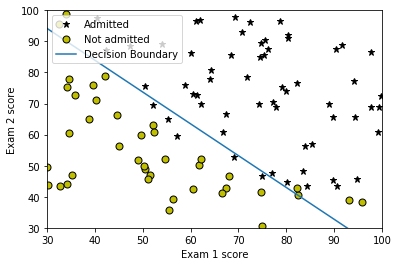

In [14]:
plotDecisionBoundary(plotData, theta, X, y)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
pass

Now that we have a decision boundary we can create a function to predict whether a given student (a single sample of two exam scores) will be admitted.

In [15]:
def predict(theta, X):
    """
    Predict whether the label is 0 or 1 using learned logistic regression.
    Computes the predictions for X using a threshold at 0.5 
    (i.e., if sigmoid(theta.T*x) >= 0.5, predict 1)
    
    Parameters
    ----------
    theta : array_like
        Parameters for logistic regression. A vecotor of shape (n+1, ).
    
    X : array_like
        The data to use for computing predictions. The rows is the number 
        of points to compute predictions, and columns is the number of
        features.

    Returns
    -------
    p : array_like
        Predictions and 0 or 1 for each row in X.
    """
    # Number of training samples
    m = X.shape[0]
    
    # initialize p
    p = np.zeros(m)
    
    temp = sigmoid(X.dot(theta))
    for i in range(m):
        if temp[i] >= 0.5:
            p[i] = 1
            
    return p
    
    

In [16]:
#  Predict probability for a student with score 45 on exam 1 
#  and score 85 on exam 2 
prob = sigmoid(np.dot([1, 45, 85], theta))
print('For a student with scores 45 and 85,'
      'we predict an admission probability of {:.3f}'.format(prob))

# Compute accuracy on our training set
p = predict(theta, X)
print('Train Accuracy: {:.2f} %'.format(np.mean(p == y) * 100))

For a student with scores 45 and 85,we predict an admission probability of 0.776
Train Accuracy: 89.00 %


<h3>2 Regularized Logistic Regression</h3>

In this part of the exercise, we will implement regularized logistic regression to predict whether microchips from a fabrication plant pass quality assurance. 

First we visualize the data

In [17]:
# Load data
# The first two columns contains the exam scores and the third column
# contains the label.
data = np.loadtxt(os.path.join('Data', 'ex2data2.txt'), delimiter=',')
X, y = data[:, 0:2], data[:, 2]

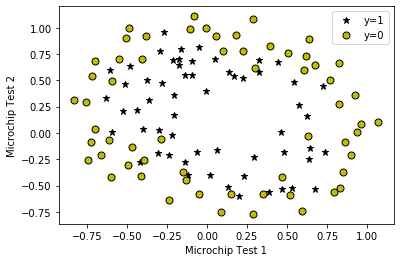

In [18]:
plotData(X,y)
plt.xlabel("Microchip Test 1")
plt.ylabel("Microchip Test 2")
plt.legend(["y=1", "y=0"])
pass

In order to create a more complex boundary, we will now map the features into all polynomial terms of x1 and x2 up to the sixth power. This results in a conversion of our vector of two features becoming a vector of 28 features.

In [19]:
# Note that mapFeature also adds a column of ones for us, so the intercept
# term is handled
X = mapFeature(X[:, 0], X[:, 1])

We can now compute the cost function and gradient for our newly mapped features

In [20]:
def costFunctionReg(theta, X, y, lambda_):
    """
    Compute cost and gradient for logistic regression with regularization.
    
    Parameters
    ----------
    theta : array_like
        Logistic regression parameters. A vector with shape (n, ). n is 
        the number of features including any intercept. If we have mapped
        our initial features into polynomial features, then n is the total 
        number of polynomial features. 
    
    X : array_like
        The data set with shape (m x n). m is the number of examples, and
        n is the number of features (after feature mapping).
    
    y : array_like
        The data labels. A vector with shape (m, ).
    
    lambda_ : float
        The regularization parameter. 
    
    Returns
    -------
    J : float
        The computed value for the regularized cost function. 
    
    grad : array_like
        A vector of shape (n, ) which is the gradient of the cost
        function with respect to theta, at the current values of theta.
    """
    # Initialize some useful values
    m = y.size  # number of training examples
    temp, n = X.shape
    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta))
    logh = np.log(h)
    tempLog = np.log(1-h)
    yTrans = y.transpose()
    Xtrans = X.transpose()
    tempTrans = (1-y).transpose()
    
    tempTheta = theta[0]
    theta[0] = 0
    J = ((-yTrans).dot(logh))
    J = J - tempTrans.dot(tempLog)
    J = J * (1/m)
    J = J + (lambda_ / (2*m)) * np.sum(np.square(theta))
    theta[0] = tempTheta
    
    diff = np.subtract(sigmoid(X.dot(theta)),y)
    grad = Xtrans.dot(diff)
    grad = grad * (1/m)
    for i in range(1,n):
        grad[i] = grad[i] + (lambda_ / m)*theta[i]
        
    
    # =============================================================
    return J, grad

In [21]:
# Initialize fitting parameters
initial_theta = np.zeros(X.shape[1])

# Set regularization parameter lambda to 1
# DO NOT use `lambda` as a variable name in python
# because it is a python keyword
lambda_ = 1

# Compute and display initial cost and gradient for regularized logistic
# regression
cost, grad = costFunctionReg(initial_theta, X, y, lambda_)

print('Cost at initial theta (zeros): {:.3f}'.format(cost))
print('Gradient at initial theta (zeros) - first two values only:')
print('\t[{:.4f}, {:.4f}]'.format(*grad[:5]))


# Compute and display cost and gradient
# with all-ones theta and lambda = 10
test_theta = np.ones(X.shape[1])
cost, grad = costFunctionReg(test_theta, X, y, 10)

print('------------------------------\n')
print('Cost at test theta    : {:.2f}'.format(cost))
print('Gradient at test theta - first two values only:')
print('\t[{:.4f}, {:.4f}]'.format(*grad[:4]))

Cost at initial theta (zeros): 0.693
Gradient at initial theta (zeros) - first two values only:
	[0.0085, 0.0188]
------------------------------

Cost at test theta    : 3.16
Gradient at test theta - first two values only:
	[0.3460, 0.1614]


With a working cost function, we can now apply linear regression to fit our parameters.

Train Accuracy: 83.1 %
Expected accuracy (with lambda = 1): 83.1 % (approx)



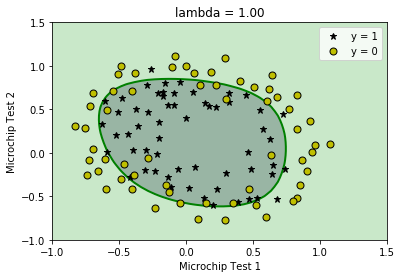

In [25]:
# Initialize fitting parameters
initial_theta = np.zeros(X.shape[1])

# Set regularization parameter lambda to 1 (We can vary this to
#     change how well fit the data is)
lambda_ = 1

# set options for optimize.minimize
options= {'maxiter': 100}

res = optimize.minimize(costFunctionReg,
                        initial_theta,
                        (X, y, lambda_),
                        jac=True,
                        method='TNC',
                        options=options)

# the fun property of OptimizeResult object returns
# the value of costFunction at optimized theta
cost = res.fun

# the optimized theta is in the x property of the result
theta = res.x

plotDecisionBoundary(plotData, theta, X, y)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(['y = 1', 'y = 0'])
plt.grid(False)
plt.title('lambda = %0.2f' % lambda_)

# Compute accuracy on our training set
p = predict(theta, X)

print('Train Accuracy: %.1f %%' % (np.mean(p == y) * 100))
print('Expected accuracy (with lambda = 1): 83.1 % (approx)\n')